# Assignment 1
Christian Max Torp-Christensen

HNS484

In [89]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [90]:
file_path = r'C:\Users\chris\Desktop\makro\ch13\Ex_13.3_dataset.xlsx'
column_names = ['Quarter', 'GDP', 'Private consumption', 'Private investment']
df = pd.read_excel(file_path, sheet_name='Sheet1', usecols='A,B,C,D',names=column_names , skiprows=10, header=None, nrows=233, decimal=',')
pd.set_option('display.float_format', '{:.2f}'.format)

In [91]:
df['GDP'] = np.log(df['GDP'])
df['Private consumption'] = np.log(df['Private consumption'])
df['Private investment'] = np.log(df['Private investment'])

lam = 1600

cycle_gdp, trend_gdp = hpfilter(df['GDP'], lamb=lam)
cycle_consumption, trend_consumption = hpfilter(df['Private consumption'], lamb=lam)
cycle_investment, trend_investment = hpfilter(df['Private investment'], lamb=lam)

df['GDP cycle'], df['GDP trend'] = cycle_gdp, trend_gdp
df['Private consumption cycle'], df['Private consumption trend'] = cycle_consumption, trend_consumption
df['Private investment cycle'], df['Private investment trend'] = cycle_investment, trend_investment

x_values = df['Quarter']



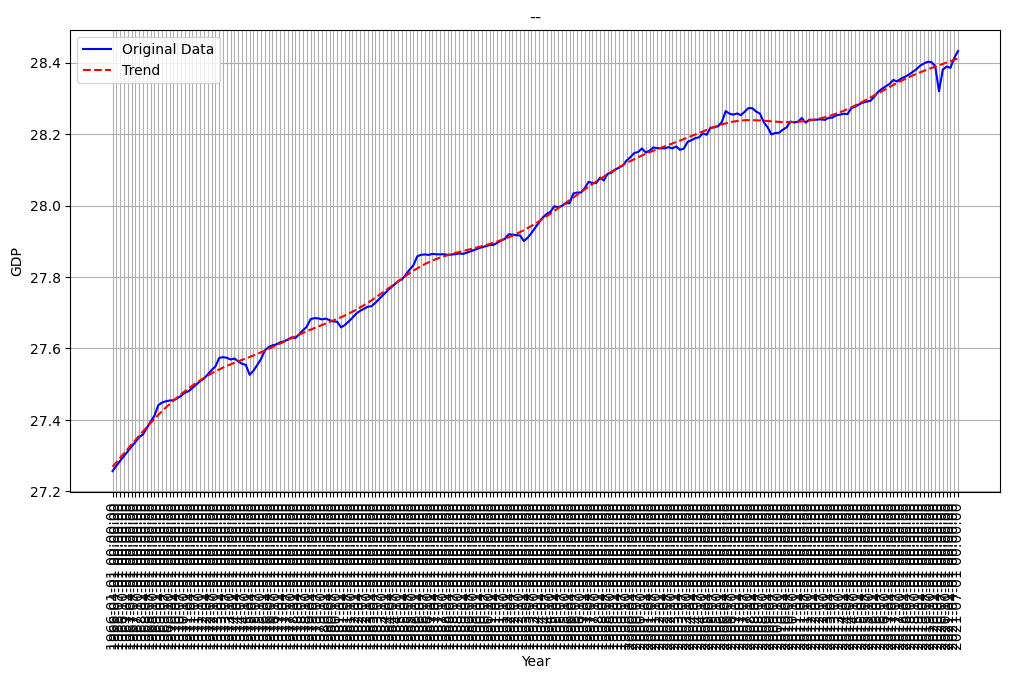

In [92]:
# all = [df['GDP'], df['Private consumption'], df['Private investment']]

plt.figure(figsize=(12, 6))
plt.plot(df['Quarter'], df['GDP'], label='Original Data', color='blue')
plt.plot(df['Quarter'], df['GDP trend'], label='Trend', color='red', linestyle='--')
plt.title('--')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.xticks(x_values, df['Quarter'], rotation=90)

plt.legend()
plt.grid(True)
plt.show()

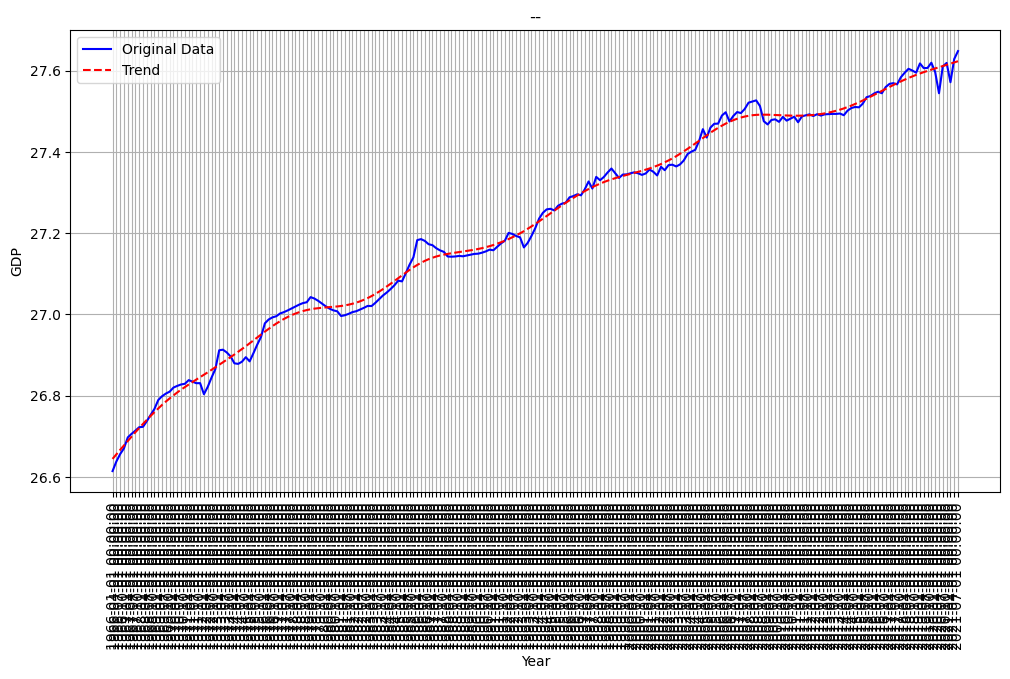

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(df['Quarter'], df['Private consumption'], label='Original Data', color='blue')
plt.plot(df['Quarter'], df['Private consumption trend'], label='Trend', color='red', linestyle='--')
plt.title('--')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.xticks(x_values, df['Quarter'], rotation=90)

plt.legend()
plt.grid(True)
plt.show()

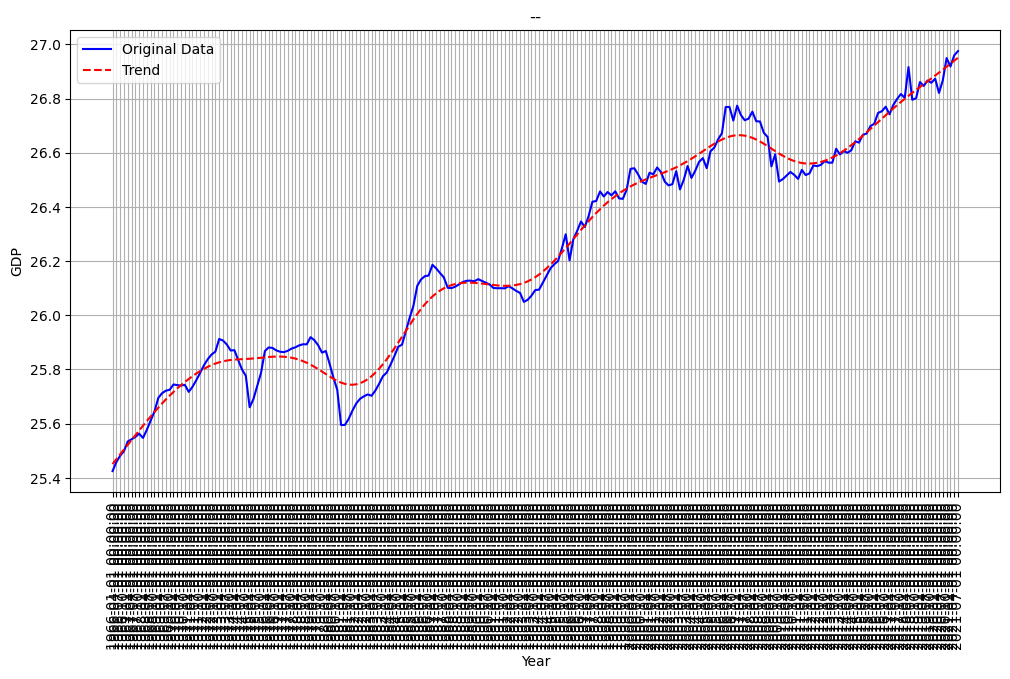

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(df['Quarter'], df['Private investment'], label='Original Data', color='blue')
plt.plot(df['Quarter'], df['Private investment trend'], label='Trend', color='red', linestyle='--')
plt.title('--')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.xticks(x_values, df['Quarter'], rotation=90)

plt.legend()
plt.grid(True)
plt.show()

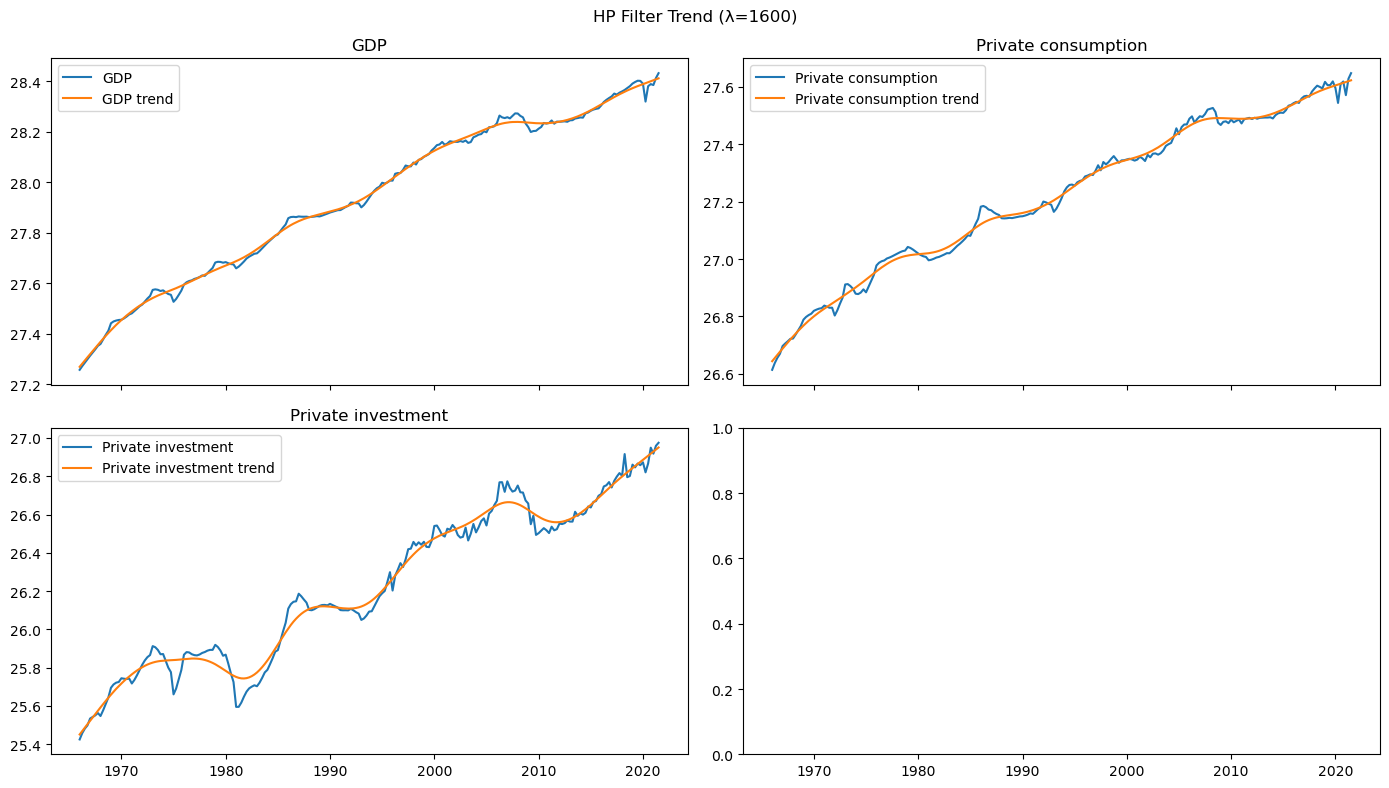

In [95]:

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
data = ["GDP", "Private consumption", "Private investment"]
data_tr = ['GDP trend', 'Private consumption trend', 'Private investment trend']
for ax, data, data_tr in zip(axes.flatten(), data, data_tr):
    ax.plot(df['Quarter'], df[data], label=data)
    ax.plot(df['Quarter'], df[data_tr], label=data_tr)
    ax.set_title(data)
    ax.legend()
    
plt.suptitle(f"HP Filter Trend (λ={lam})")
plt.tight_layout()
plt.show()

## Part 1 

It seems like the trend follows the real data quite well. With private investment, it would be favorable to have a lower lambda so it would follow the real data a bit better.

The problems with the end points are that there are not any data to correct the line, so it will be more affected by the last data point.

In [96]:

df1 = df.iloc[16:-16]


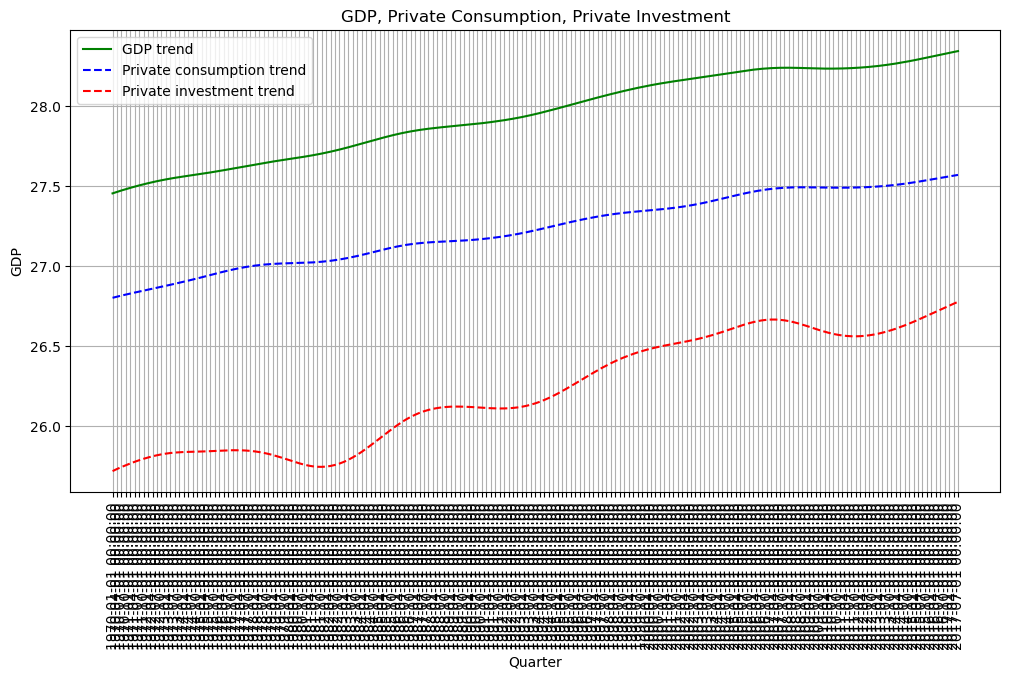

In [97]:
x_values_df1 = df1['Quarter']

plt.figure(figsize=(12, 6))

plt.plot(df1['Quarter'], df1['GDP trend'], label='GDP trend', color='green', linestyle='-')
plt.plot(df1['Quarter'], df1['Private consumption trend'], label='Private consumption trend', color='blue', linestyle='--')
plt.plot(df1['Quarter'], df1['Private investment trend'], label='Private investment trend', color='red', linestyle='--')
plt.title('GDP, Private Consumption, Private Investment')
plt.xlabel('Quarter')

plt.xticks(x_values_df1, df1['Quarter'], rotation=90)

plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

# 2


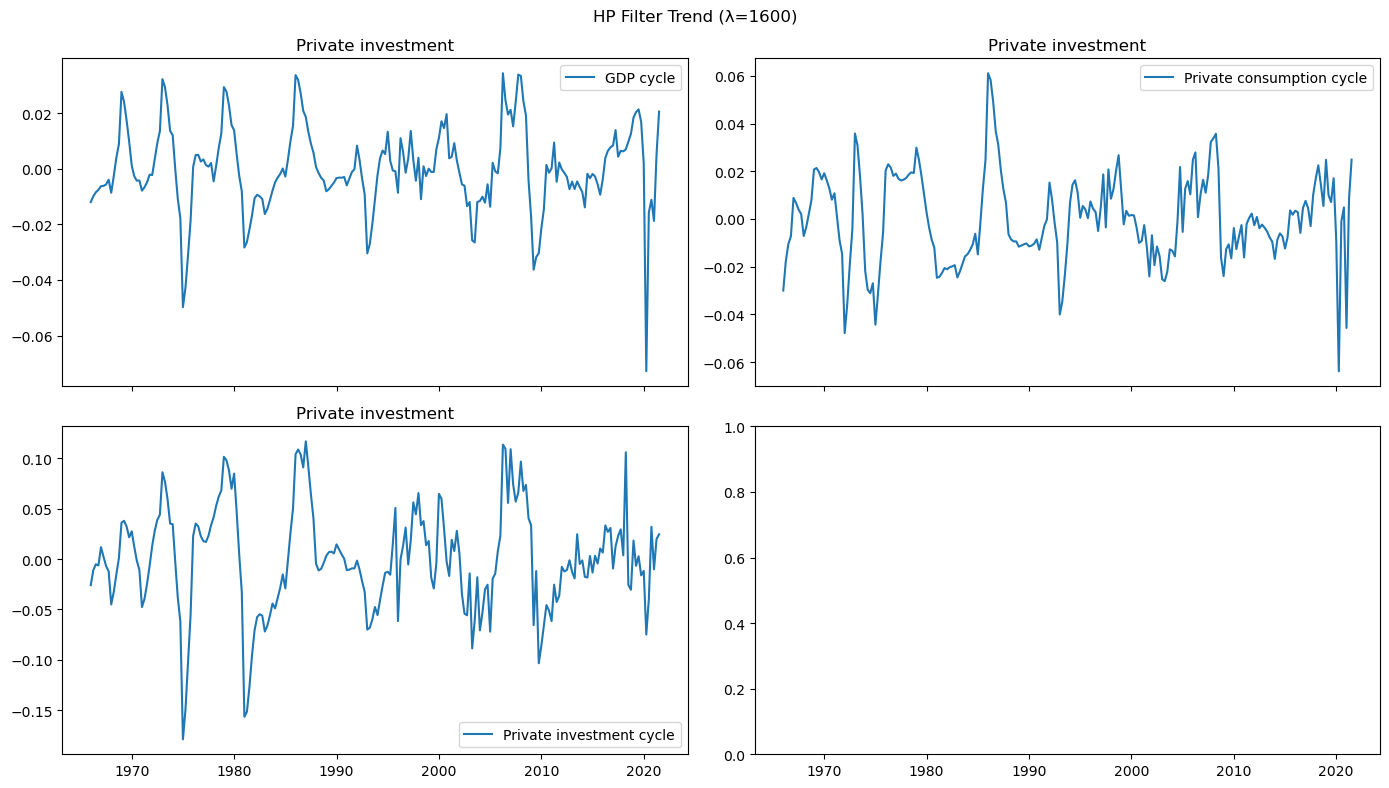

In [98]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
data_cy= ['GDP cycle', 'Private consumption cycle', 'Private investment cycle']
for ax, data_cy in zip(axes.flatten(), data_cy):
    ax.plot(df['Quarter'], df[data_cy], label=data_cy)
    ax.set_title(data)
    ax.legend()
    
plt.suptitle(f"HP Filter Trend (λ={lam})")
plt.tight_layout()
plt.show()

In [99]:
df[['GDP cycle', 'GDP']].describe()

,GDP cycle,GDP
count,223.00,223.00
mean,-0.00,27.94
std,0.02,0.31
min,-0.07,27.26
25%,-0.01,27.68
50%,-0.00,27.94
75%,0.01,28.23
max,0.03,28.43


## part 2

Here I can see the cycles and in the table are GDP cycle and GDP log.

## 3

In [100]:
df['GDP cycle'] *= 100
df['Private consumption cycle'] *= 100
df['Private investment cycle'] *= 100

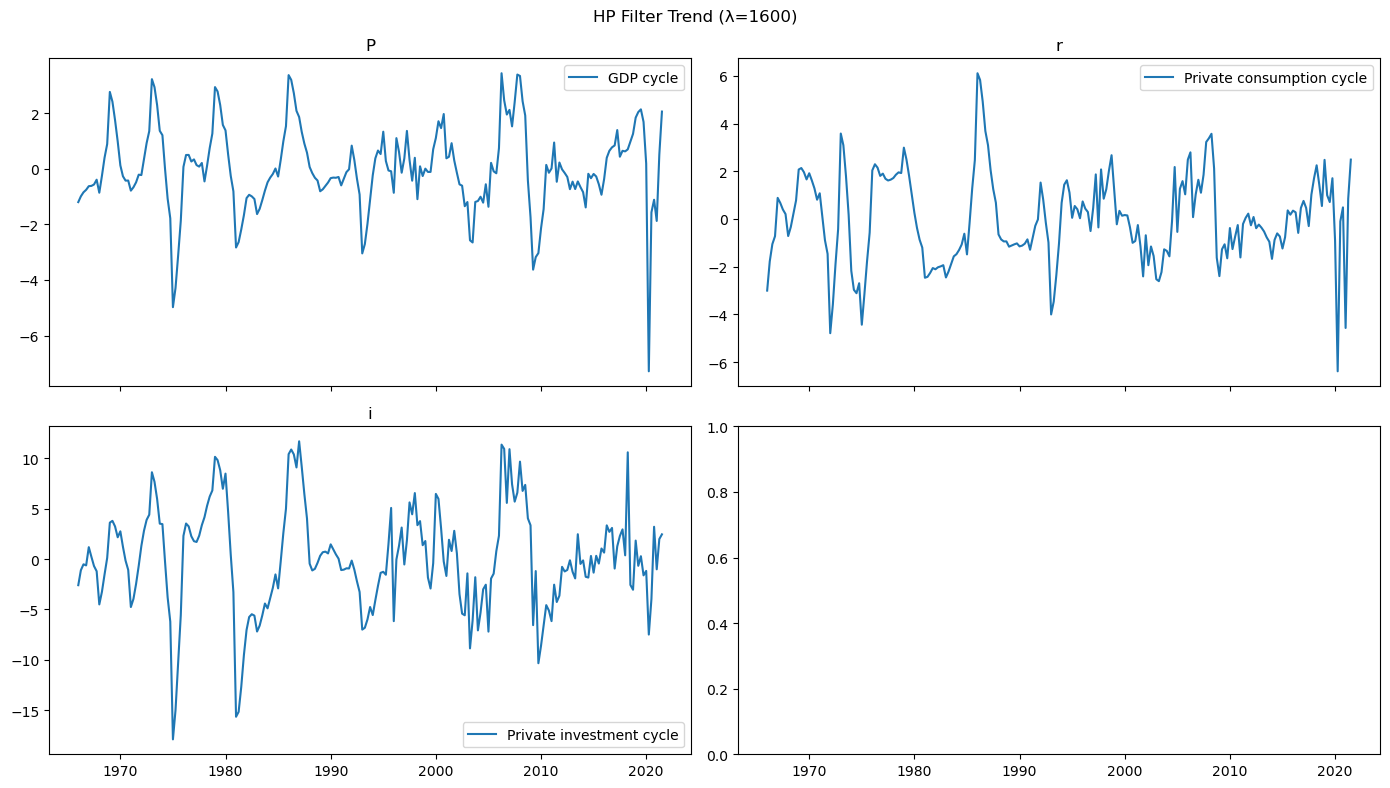

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
data_cy = ['GDP cycle', 'Private consumption cycle', 'Private investment cycle']
for ax, data, data_cy in zip(axes.flatten(), data, data_cy):
    ax.plot(df['Quarter'], df[data_cy], label=data_cy)
    ax.set_title(data)
    ax.legend()
    
plt.suptitle(f"HP Filter Trend (λ={lam})")
plt.tight_layout()
plt.show()

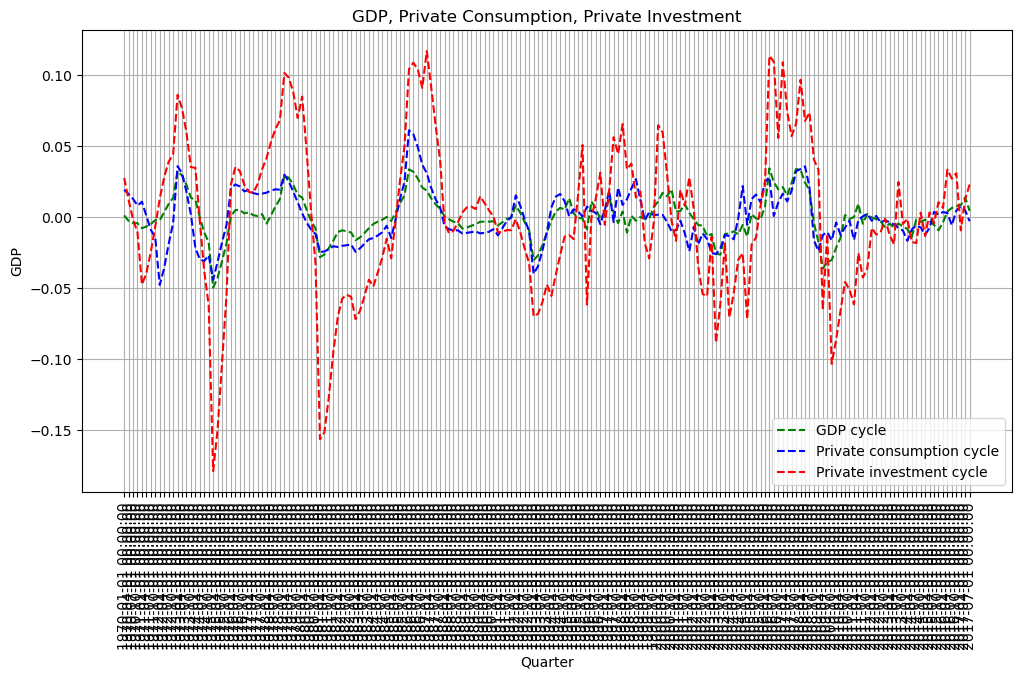

In [102]:
plt.figure(figsize=(12, 6))

plt.plot(df1['Quarter'], df1['GDP cycle'], label='GDP cycle', color='green', linestyle='--')
plt.plot(df1['Quarter'], df1['Private consumption cycle'], label='Private consumption cycle', color='blue', linestyle='--')
plt.plot(df1['Quarter'], df1['Private investment cycle'], label='Private investment cycle', color='red', linestyle='--')
plt.title('GDP, Private Consumption, Private Investment')
plt.xlabel('Quarter')

plt.xticks(x_values_df1, df1['Quarter'], rotation=90)

plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

## Part 3

Private investment is the most volatile variable by far. This also correlates with the Stylized Business Cycle Fact 2 saying that investment is around 4-5 times more volatile than GDP.

# 4

## $ \rho(x_t, c_t) = \frac{s_{xc}}{s_x s_c} = \frac{\sum_{t=1}^{T} (x_t - \bar{x})(c_t - \bar{c})}{\sqrt{\sum_{t=1}^{T} (x_t - \bar{x})^2} \cdot \sqrt{\sum_{t=1}^{T} (c_t - \bar{c})^2}} $


In [1]:
numerator = ((df['GDP'] - df['GDP'].mean())*(df['GDP cycle'] - df['GDP cycle'].mean())).sum()
print(f"Covariance between GDP and GDP cycle: {numerator}")

denominator = np.sqrt(((df['GDP'] - df['GDP'].mean())**2).sum()) * np.sqrt(((df['GDP cycle'] - df['GDP cycle'].mean())**2).sum())
print(f"Denominator: {denominator}")

correlation = numerator / denominator
print(f"Correlation between GDP and GDP cycle: {correlation}")


NameError: name 'df' is not defined

In [ ]:
def corr(x, c):
   
    x_diff = x - np.mean(x)
    c_diff = c - np.mean(c)

    return np.sum(x_diff * c_diff) / (np.sqrt(np.sum(x_diff**2)) * np.sqrt(np.sum(c_diff**2)))

# corr(df['GDP'], df['GDP cycle'])

# def corrLag(var1, var2, lag):

#     lag_var = var1.shift(lag).dropna()
#     var2 = var2[lag_var.index]

#     return corr(lag_var, var2)

def corrLag(var1, var2, lag):

    if lag >= 0:
        lag_var = var1.shift(-lag).dropna()
        var2 = var2[:len(lag_var)]
        return corr(lag_var, var2)
    
    else:
        lead_var = var2.shift(lag).dropna()
        var1 = var1[:len(lead_var)]
        return corr(var1, lead_var)



# print(corrLag(df['GDP cycle'], df['Private consumption cycle'], -2))
# print(corrLag(df['GDP cycle'], df['Private consumption cycle'], -1))
# print(corrLag(df['GDP cycle'], df['Private consumption cycle'], 0))
# print(corrLag(df['GDP cycle'], df['Private consumption cycle'], 1))
# print(corrLag(df['GDP cycle'], df['Private consumption cycle'], 2))

In [ ]:
lags = [-2, -1, 0, 1, 2]
corrs_GDP = [corrLag(df['GDP cycle'], df['GDP cycle'], lag) for lag in lags]
corrs_pcc = [corrLag(df['GDP cycle'], df['Private consumption cycle'], lag) for lag in lags]
corrs_pic = [corrLag(df['GDP cycle'], df['Private investment cycle'], lag) for lag in lags]

corrs = pd.DataFrame({'Lags': lags, 'GDP': corrs_GDP, 'Private consumption cycle': corrs_pcc, 'Private investment cycle': corrs_pic})
corrs.set_index('Lags', inplace=True)


print(corrs.transpose().to_markdown())

|                           |       -2 |       -1 |        0 |        1 |        2 |
|:--------------------------|---------:|---------:|---------:|---------:|---------:|
| GDP                       | 0.567821 | 0.773673 | 1        | 0.773673 | 0.567821 |
| Private consumption cycle | 0.37571  | 0.537166 | 0.747857 | 0.642181 | 0.495021 |
| Private investment cycle  | 0.579298 | 0.70897  | 0.78946  | 0.634392 | 0.51046  |


## Part 4

It fits Table 13.3 quite well.

Private consumption and private investment are neither leading nor lagged variables. They are coincident indicators, meaning that they follow the economy in sync. This means that they show what is happening right now and do not indicate the past or the future.

